# IMPORTING LIBRAIRES 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("../Dataset/training_data.csv")

In [5]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
data.shape

(31962, 3)

In [7]:
data.size

95886

In [8]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [11]:
# removing handle names
def remove_handle(tweet):
    match = re.findall("@[\w]*",tweet)
    for i in match:
        tweet = re.sub(i,'',tweet)
    return tweet

In [12]:
vector = np.vectorize(remove_handle)

In [13]:
data['tweets without handle'] = vector(data['tweet'])

In [14]:
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
data['tweets without handle'] = data['tweets without handle'].str.replace("[^a-zA-Z#]"," ")

In [16]:
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [17]:
data.tail()

,id,label,tweet,tweets without handle
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...
31961,31962,0,thank you @user for you follow,thank you for you follow


In [18]:
data['tweets without handle'] = data['tweets without handle'].str.replace("[^a-zA-Z#]"," ")

In [19]:
#tokenize the words
tokenized_tweets = data['tweets without handle'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tweets without handle, dtype: object

In [20]:
#sTEMMING THE WORDS
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x : [ps.stem(word) for word in x])
tokenized_tweets.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: tweets without handle, dtype: object

In [21]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
data['tweets without handle'] = tokenized_tweets
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


In [22]:
data.tail()

,id,label,tweet,tweets without handle
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwav tri to wrap h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen to sad song on a monday morn otw to wor...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis in in #calgari #wso cond...
31961,31962,0,thank you @user for you follow,thank you for you follow


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer_bow = CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x_bow = vectorizer_bow.fit_transform(data['tweets without handle']).toarray()

In [26]:
x_bow.shape

(31962, 6000)

In [27]:
y_bow = data['label']

In [28]:
y_bow.shape

(31962,)

In [30]:
from sklearn.model_selection import train_test_split
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow = train_test_split(x_bow,y_bow,test_size=0.2,random_state=3)

In [31]:
vectorizer_bow.get_feature_names()

['aap',
 'ab',
 'abandon',
 'abc',
 'abl',
 'abov',
 'abrahamhick',
 'abrahamhick lawofattract',
 'abrahamhick lawofattract healthi',
 'abrahamhick lawofattract healthi heal',
 'absolut',
 'abt',
 'abund',
 'abus',
 'accept',
 'accept amp',
 'accept amp sale',
 'accept amp sale photographi',
 'access',
 'accessori',
 'accid',
 'accord',
 'account',
 'accus',
 'ace',
 'ach',
 'achiev',
 'acn',
 'acn altwaystoh',
 'acn altwaystoh healthi',
 'acn altwaystoh healthi heal',
 'act',
 'act like',
 'action',
 'activ',
 'activist',
 'actor',
 'actor seeklearn',
 'actor seeklearn stafresh',
 'actorslif',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'adapt environ',
 'adapt environ need',
 'adapt environ need tear',
 'add',
 'add follow',
 'addict',
 'addit',
 'address',
 'adel',
 'admit',
 'adopt',
 'ador',
 'adult',
 'advanc',
 'advantag',
 'adveis',
 'adventur',
 'advic',
 'advoc',
 'af',
 'affair',
 'affect',
 'affirm',
 'afford',
 'afraid',
 'africa',
 'african',
 'african american',
 '

In [32]:
vectorizer_bow.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [33]:
count_df = pd.DataFrame(x_bow,columns = vectorizer_bow.get_feature_names())

In [34]:
count_df.head()

,aap,ab,abandon,abc,abl,abov,abrahamhick,abrahamhick lawofattract,abrahamhick lawofattract healthi,abrahamhick lawofattract healthi heal,...,yummi,yup,yyc,zara,zealand,zelda,zen,zero,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tdif = TfidfVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))

In [36]:
x_tdif = vectorizer_tdif.fit_transform(data['tweets without handle'])


In [37]:
x_tdif = x_tdif.todense()
x_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y_tdif=data['label']

In [39]:
y_tdif

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
xtrain_tdif,xtest_tdif,ytrain_tdif,ytest_tdif = train_test_split(x_tdif,y_tdif,test_size=0.2,random_state=3)

In [43]:
xtrain_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
xtrain_tdif.shape

(25569, 6000)

In [45]:
ytrain_tdif.shape

(25569,)

In [46]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [47]:
nb.fit(xtrain_bow,ytrain_bow)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
ytest_nb_bow_pred = nb.predict(xtest_bow)

In [49]:
from sklearn import metrics
ytest_nb_bow_score = metrics.accuracy_score(ytest_bow,ytest_nb_bow_pred)

In [50]:
ytest_nb_bow_score*100

94.94759893633662

In [51]:
ytest_nb_bow_confusion_matrix = metrics.confusion_matrix(ytest_bow,ytest_nb_bow_pred)

In [52]:
ytest_nb_bow_confusion_matrix

array([[5766,  184],
       [ 139,  304]], dtype=int64)

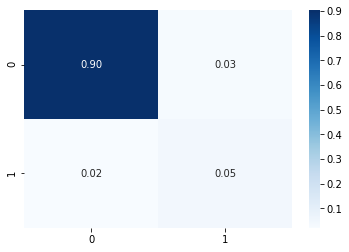

In [53]:
sns.heatmap(ytest_nb_bow_confusion_matrix/np.sum(ytest_nb_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

In [55]:
print(metrics.classification_report(ytest_bow,ytest_nb_bow_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5950
           1       0.62      0.69      0.65       443

    accuracy                           0.95      6393
   macro avg       0.80      0.83      0.81      6393
weighted avg       0.95      0.95      0.95      6393

